# PCA

## 用途 ：降维

降维就是一种对高维度特征数据预处理方法。降维是将高维度的数据保留下最重要的一些特征，去除噪声和不重要的特征，从而实现提升数据处理速度的目的。在实际的生产和应用中，降维在一定的信息损失范围内，可以为我们节省大量的时间和成本。降维也成为应用非常广泛的数据预处理方法。

降维具有如下一些优点：

1) 使得数据集更易使用。  
2) 降低算法的计算开销。  
3) 去除噪声。  
4) 使得结果容易理解。  
降维的算法有很多，比如奇异值分解(SVD)、主成分分析(PCA)、因子分析(FA)、独立成分分析(ICA)。


## 概念

PCA(Principal Component Analysis)，即主成分分析方法，是一种使用最广泛的数据降维算法。  

**PCA的主要思想是将 n 维特征映射到 k 维上，这 k 维是全新的正交特征也被称为主成分，是在原有n维特征的基础上重新构造出来的k维特征。** 

    PCA的工作就是从原始的空间中顺序地找一组相互正交的坐标轴，新的坐标轴的选择与数据本身是密切相关的。  
其中，**第一个新坐标轴选择是原始数据中方差最大的方向**，**第二个新坐标轴选取是与第一个坐标轴正交的平面中使得方差最大的**，**第三个轴是与第1,2个轴正交的平面中方差最大的**。依次类推，可以得到n个这样的坐标轴。通过这种方式获得的新的坐标轴，我们发现，大部分方差都包含在前面k个坐标轴中，后面的坐标轴所含的方差几乎为0。     
    于是，我们可以忽略余下的坐标轴，只保留前面k个含有绝大部分方差的坐标轴。事实上，这相当于只保留包含绝大部分方差的维度特征，而忽略包含方差几乎为0的特征维度，实现对数据特征的降维处理。


对于3维数据(x,y,z)，计算它的协方差就是：

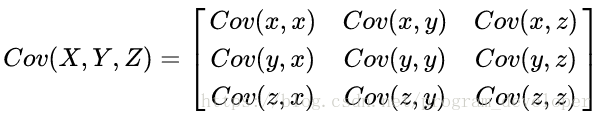

事实上，通过计算数据矩阵的协方差矩阵，然后得到协方差矩阵的特征值特征向量，选择特征值最大(即方差最大)的k个特征所对应的特征向量组成的矩阵。这样就可以将数据矩阵转换到新的空间当中，实现数据特征的降维。

由于得到协方差矩阵的特征值特征向量有两种方法：特征值分解协方差矩阵、奇异值分解协方差矩阵，所以PCA算法有两种实现方法：基于特征值分解协方差矩阵实现PCA算法、基于SVD分解协方差矩阵实现PCA算法。


对于数据X的散度矩阵为$XX^T$。其实协方差矩阵和散度矩阵关系密切，散度矩阵就是协方差矩阵乘以（总数据量-1）。因此它们的特征值和特征向量是一样的。这里值得注意的是，散度矩阵是SVD奇异值分解的一步，因此PCA和SVD是有很大联系。

## 数学解释
http://blog.codinglabs.org/articles/pca-tutorial.html

PCA算法 [1] 
总结一下PCA的算法步骤：

设有$m\times n$数据。

1）将原始数据按列组成$m\times n$矩阵X

2）将X的每一行（代表一个属性字段）进行零均值化，即减去这一行的均值

3）求出协方差矩阵$C=\frac{1}{n}X^TX$  
4）求出协方差矩阵的特征值及对应的特征向量

5）将特征向量按对应特征值大小从上到下按行排列成矩阵，取前k行组成矩阵P

6）Y=PX即为降维到k维后的数据

**降维问题的优化目标：将一组N维向量降为K维（K大于0，小于N），其目标是选择K个单位（模为1）正交基，使得原始数据变换到这组基上后，各字段两两间协方差为0，而字段的方差则尽可能大（在正交的约束下，取最大的K个方差）。**

**PCA也存在一些限制，例如它可以很好的解除线性相关，但是对于高阶相关性就没有办法了，对于存在高阶相关性的数据，可以考虑Kernel PCA，通过Kernel函数将非线性相关转为线性相关。另外，PCA假设数据各主特征是分布在正交方向上，如果在非正交方向上存在几个方差较大的方向，PCA的效果就大打折扣了。**

## 小结


- PAC 算法实现了将N维数据转换为K维数据的办法（K<N）    
     
- 在进行降维时考虑只保留线性无关的特征向量，计算矩阵的线性无关的特征向量
    - 对于方阵 A 而言只需计算出其所有特征值对应特征向量，由单位特征向量组成的矩阵就是下面的 Q ,$\sum$即为对角线为特征值的对角阵中最大的K个元素对应的特征向量组成的矩阵就是PCA求解的目标矩阵
    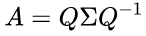
    - 当 A 不是方阵时，可根据svd的思路或者 $AA^T$（上述计算[1]）的思路进行求解

**SVD求解矩阵的特征向量和特征值：**  
首先，我们用矩阵A的转置乘以A，得到一个方阵，用这样的方阵进行特征分解，得到的特征值和特征向量满足下面的等式：
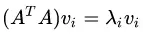
这里的$v_i$就是我们要求的右奇异向量。

其次，我们将A和A的转置做矩阵的乘法，得到一个方阵，用这样的方阵进行特征分解，得到的特征和特征向量满足下面的等式：

这里的$u_i$ 就是左奇异向量。

思考：上面我们说 的特征向量组成的矩阵就是我们SVD中的V矩阵，而的特征向量组成的就是我们SVD中的U矩阵，这有什么根据么?我们来证明一下，以V矩阵的证明为例。








上式证明中使用了

$A^TA$ 的特征向量组成的矩阵就是我们SVD中的V矩阵，而的 $AA^T$ 特征向量组成的就是我们SVD中的U矩阵。


此外，我们还可以得到奇异值，奇异值求法有两种：

a) 第一种：
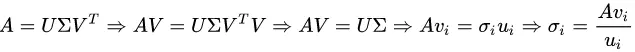


b)第二种：

通过上面*式的证明，我们还可以看出，特征值矩阵等于奇异值矩阵的平方，也就是说特征值和奇异值满足如下关系：





这里的就是$\lambda_i$奇异值，奇异值跟特征值类似，在矩阵Σ中也是从大到小排列。

# 手写代码

In [1]:
import numpy as np
def pca(x,k):
    m,n=x.shape
    #中心化处理
    normal_x=x-np.mean(x,axis=0)
    #求散度矩阵
    scatter_x=x.T.dot(x)
    #求特征值和特征向量
    eig_val,eig_vec=np.linalg.eig(scatter_x)
    #将特征值和特征向量组合在一起
    eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(n)]
    #按特征值的从大至小排序
    eig_pairs.sort(reverse=True)
    #取前k个
    feature=np.array([ele[1] for ele in eig_pairs[:k]])
    #
    data=normal_x.dot(feature.T)

    return data

In [2]:
X = np.array([[-1, 1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

pca(X,1)

array([[-0.5001634 ],
       [-2.40227643],
       [-3.77865835],
       [ 1.20113822],
       [ 2.05178902],
       [ 3.42817095]])

散度矩阵应该是$n\times n$的矩阵

# sklearn封装的PCA

sklearn中的PCA采用svd来求解特征向量和特征矩阵

In [3]:
from sklearn.decomposition import PCA
c=PCA(n_components=1)
c.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
c.transform(X)

array([[ 0.50917706],
       [ 2.40151069],
       [ 3.7751606 ],
       [-1.20075534],
       [-2.05572155],
       [-3.42937146]])

In [5]:
c.get_covariance()
#计算与生成模型的数据协方差。

array([[5.6       , 3.2       ],
       [3.2       , 2.26666667]])

In [8]:
c=PCA(n_components=0.95)
#n_components是0-1之间的数代表的是，置信度

In [9]:
c.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
c.transform(X)

array([[ 0.50917706],
       [ 2.40151069],
       [ 3.7751606 ],
       [-1.20075534],
       [-2.05572155],
       [-3.42937146]])

In [11]:
c.explained_variance_ratio_

array([0.95864607])

In [12]:
c.n_components_

1

# 使用PCA的效率提升

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [14]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [16]:
X_train.shape

(1347, 64)

In [17]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

Wall time: 7.57 ms


In [18]:
knn_clf.score(X_test, y_test)

0.9866666666666667

使用pca

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [20]:
%%time 
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 2.96 ms


In [21]:
knn_clf.score(X_test_reduction, y_test)

0.98

In [22]:
pca.n_components_

28

In [23]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469, 0.11777729, 0.08499689, 0.0586019 ,
       0.05115429, 0.04266053, 0.03601197, 0.03411058, 0.03054078,
       0.02423377, 0.02287006, 0.01803046, 0.0179346 , 0.01457983,
       0.01420448, 0.0129961 , 0.0126617 , 0.01017286, 0.00909315,
       0.0088522 , 0.00773828, 0.00760516, 0.00711865, 0.00685977,
       0.00576412, 0.00571688, 0.00508256])

In [24]:
np.sum(pca.explained_variance_ratio_)

0.9503917218164106

降噪

In [25]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [26]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    example_digits = np.vstack([example_digits, noisy_digits[y==num,:][:10]])

In [27]:
example_digits.shape

(100, 64)

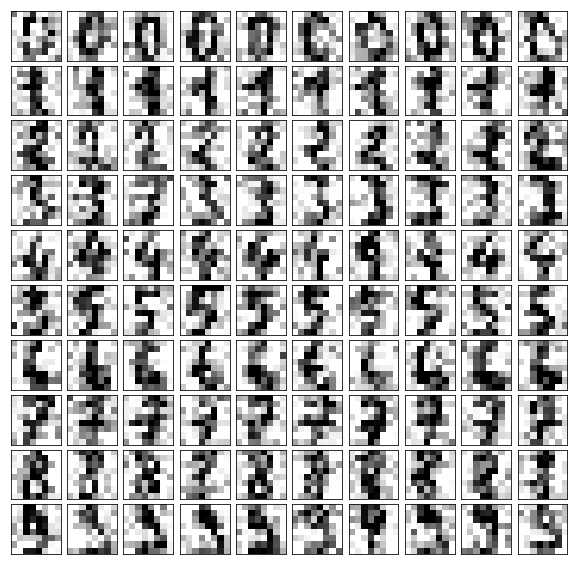

In [28]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [35]:
pca = PCA(0.55).fit(noisy_digits)

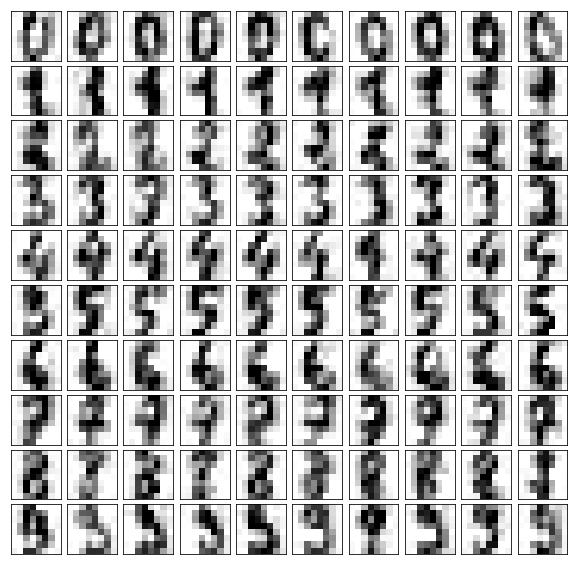

In [36]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)#将数据转换回原始空间
plot_digits(filtered_digits)